In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk

In [ ]:
col_names = ['ID', 'Entity', 'Sentiment', 'Tweet']
data = pd.read_csv('twitter_training.csv', names=col_names)

In [ ]:
data.head()

,ID,Entity,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:

data.columns

Index(['ID', 'Entity', 'Sentiment', 'Tweet'], dtype='object')

In [ ]:
data.shape

(60955, 4)

In [ ]:
data.describe()

,ID
count,60955.000000
mean,6231.547043
std,3953.820926
min,1.000000
25%,2608.000000
50%,5990.000000
75%,9793.000000
max,13200.000000


In [ ]:
data.isna().sum()

ID             0
Entity         0
Sentiment      0
Tweet        554
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isna().sum()

ID           0
Entity       0
Sentiment    0
Tweet        0
dtype: int64

In [ ]:
data.duplicated().sum()

1945

In [ ]:
sentiment_count = data['Sentiment'].value_counts()
sentiment_count

Sentiment
Negative      17497
Positive      17081
Neutral       14491
Irrelevant    11332
Name: count, dtype: int64

In [ ]:
# Defining a function to handle non-string values
def analyze_sentiment(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    else:
        return 0.0

In [ ]:
# Performing sentiment analysis and categorizing sentiment
data['Polarity'] = data['Tweet'].apply(analyze_sentiment)
data['Sentiment_Label'] = data['Polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

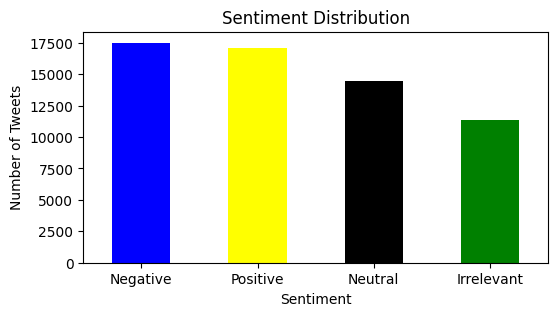

In [ ]:
# Countplot to see how different sentiment are present
plt.figure(figsize=(6, 3))
sentiment_count.plot(kind='bar', color=['blue', 'yellow', 'black', 'green'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [ ]:
brand_data = data[data['Entity'].str.contains('Microsoft', case=False)]
brand_sentiment_counts = brand_data['Sentiment'].value_counts()
brand_sentiment_counts

Sentiment
Neutral       825
Negative      764
Positive      602
Irrelevant    170
Name: count, dtype: int64

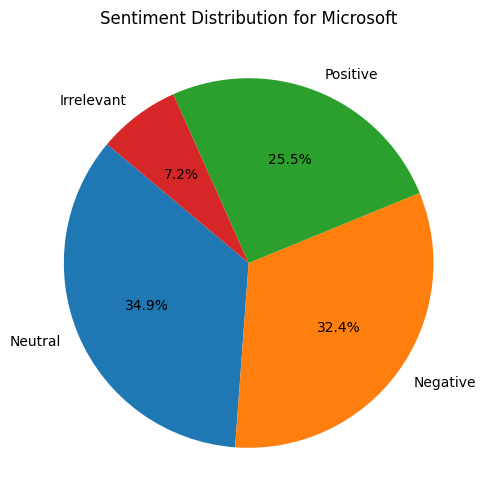

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(brand_sentiment_counts, labels=brand_sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution for Microsoft')
plt.show()

<Axes: xlabel='Entity'>

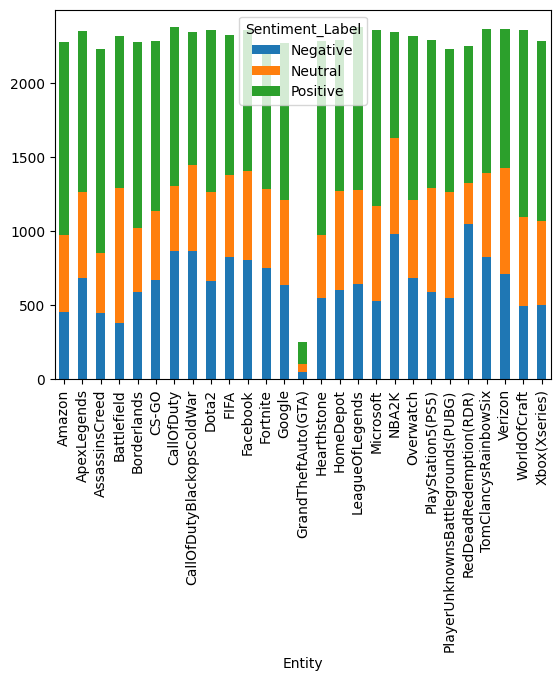

In [ ]:
# Barplot to see different sentiment composition for different topics
sentiment_by_topic = data.groupby(['Entity', 'Sentiment_Label']).size().unstack(fill_value=0)
sentiment_by_topic.plot(kind='bar', stacked=True)

In [ ]:
# Printing most positive and most negtive tweet
most_positive_tweet = data[data['Polarity'] == data['Polarity'].max()]['Tweet'].values[0]
most_negative_tweet = data[data['Polarity'] == data['Polarity'].min()]['Tweet'].values[0]
print('Most Positive Tweet:')
print(most_positive_tweet)
print('\nMost Negative Tweet:')
print(most_negative_tweet)

Most Positive Tweet:
Platinum is the best loot @Borderlands  

Most Negative Tweet:
"What terrible bitch!"


<Axes: xlabel='Entity'>

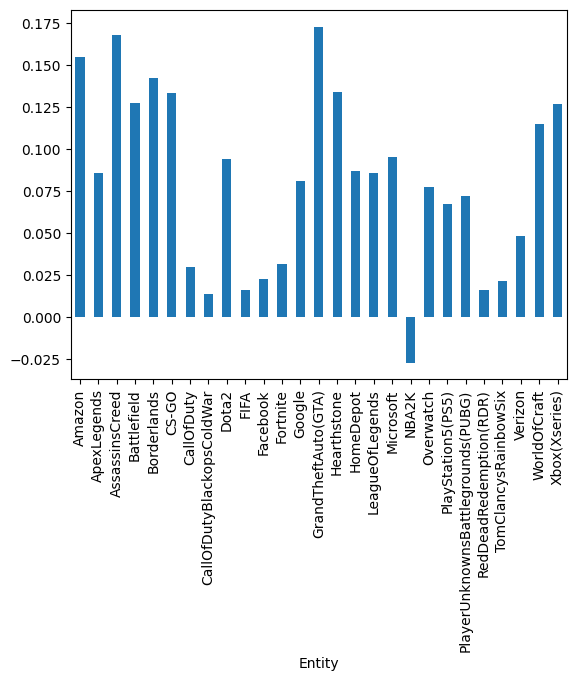

In [ ]:
# Barplot to see polarity of sentiments for different topics
average_polarity_by_topic = data.groupby('Entity')['Polarity'].mean()
average_polarity_by_topic.plot(kind='bar')